In [74]:
#Load the dataset 

import pickle
import numpy as np

# Load training and validation sets
with open('ECG5000_train.pickle', 'rb') as f:
    train_data = pickle.load(f)

with open('ECG5000_validation.pickle', 'rb') as f:
    val_data = pickle.load(f)


In [75]:
#Preprocessing
# Separate features and labels
from sklearn.preprocessing import StandardScaler
y_train = train_data[:, 0].astype(int)
X_train = train_data[:, 1:]

y_val = val_data[:, 0].astype(int)
X_val = val_data[:, 1:]

# Normalize each set independently
scaler_train = StandardScaler()
X_train_scaled = scaler_train.fit_transform(X_train)

scaler_val = StandardScaler()
X_val_scaled = scaler_val.fit_transform(X_val)

# Reshape for CNN/LSTM input: (samples, timesteps, channels)
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_val_scaled = X_val_scaled.reshape((X_val_scaled.shape[0], X_val_scaled.shape[1], 1))

# Confirm shapes
print("Train shape:", X_train_scaled.shape)
print("Validation shape:", X_val_scaled.shape)

Train shape: (500, 140, 1)
Validation shape: (1500, 140, 1)


In [76]:
#Train Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Conv1D(filters=32, kernel_size=5, activation='relu', input_shape=(140, 1)),
    MaxPooling1D(pool_size=2),
    LSTM(units=64, return_sequences=False),
    Dropout(0.5),
    Dense(units=64, activation='relu'),
    Dense(units=5, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    X_train, y_train,  # shape: (num_samples, 140, 1)
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stop]
)




Epoch 1/20


C:\Users\purva\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 145ms/step - accuracy: 0.4284 - loss: 1.5012 - val_accuracy: 0.8280 - val_loss: 0.9250
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - accuracy: 0.7767 - loss: 0.7733 - val_accuracy: 0.8473 - val_loss: 0.6423
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 134ms/step - accuracy: 0.8542 - loss: 0.5727 - val_accuracy: 0.8620 - val_loss: 0.5974
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 137ms/step - accuracy: 0.8971 - loss: 0.4350 - val_accuracy: 0.8767 - val_loss: 0.5324
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.9184 - loss: 0.3984 - val_accuracy: 0.8880 - val_loss: 0.4484
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 143ms/step - accuracy: 0.9368 - loss: 0.2880 - val_accuracy: 0.8927 - val_loss: 0.3815
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - accuracy: 0.9272 - loss: 0.2845 - val_accuracy: 0.9013 - val_loss: 0.3493
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - accuracy: 0.9305 - loss: 0.2215 - val_accuracy: 0.9020 - val_l

In [77]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Flatten, LeakyReLU
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping

# model = Sequential()

# # Conv Layer 1
# model.add(Conv1D(filters=32, kernel_size=5, padding='same', input_shape=(140, 1)))
# model.add(LeakyReLU(alpha=0.001))

# # Conv Layer 2
# model.add(Conv1D(filters=64, kernel_size=5, padding='same'))
# model.add(LeakyReLU(alpha=0.001))

# # Conv Layer 3
# model.add(Conv1D(filters=64, kernel_size=5, padding='same'))
# model.add(LeakyReLU(alpha=0.001))

# # Conv Layer 4
# model.add(Conv1D(filters=128, kernel_size=5, padding='same'))
# model.add(LeakyReLU(alpha=0.001))

# # Conv Layer 5
# model.add(Conv1D(filters=128, kernel_size=5, padding='same'))
# model.add(LeakyReLU(alpha=0.001))

# # MaxPool + Dropout 1
# model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))
# model.add(Dropout(0.45))

# # LSTM Layer 1
# model.add(LSTM(210, return_sequences=True))

# # MaxPool 2
# model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))

# # LSTM Layer 2
# model.add(LSTM(190, return_sequences=True))

# # MaxPool 3
# model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))

# # Flatten before FC layers
# model.add(Flatten())

# # Fully Connected Layer
# model.add(Dense(64, activation='relu'))

# # Output Layer
# model.add(Dense(5, activation='softmax'))

# # Compile
# model.compile(
#     optimizer=Adam(learning_rate=0.001),
#     loss='sparse_categorical_crossentropy',
#     metrics=['accuracy']
# )

# # Early stopping
# early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# # Train
# history = model.fit(
#     X_train, y_train,  # Input shape: (num_samples, 140, 1)
#     epochs=20,
#     batch_size=32,
#     validation_data=(X_val, y_val),
#     callbacks=[early_stop]
# )


In [78]:
#Validate the classifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import label_binarize
import numpy as np

# Predict class probabilities on validation set
val_probs = model.predict(X_val_scaled)

# Convert probabilities to class predictions
val_preds = np.argmax(val_probs, axis=1)

# Compute evaluation metrics
accuracy = round(accuracy_score(y_val, val_preds), 4)
precision = round(precision_score(y_val, val_preds, average='weighted'), 4)
recall = round(recall_score(y_val, val_preds, average='weighted'), 4)
f1 = round(f1_score(y_val, val_preds, average='weighted'), 4)

# Binarize labels for AUROC calculation
y_val_bin = label_binarize(y_val, classes=np.unique(y_val))
auroc = round(roc_auc_score(y_val_bin, val_probs, average='weighted', multi_class='ovr'), 4)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_val, val_preds)

# Specificity calculation (per class)
specificity_per_class = []
for i in range(cf_matrix.shape[0]):
    tn = np.sum(np.delete(np.delete(cf_matrix, i, axis=0), i, axis=1))
    fp = np.sum(np.delete(cf_matrix, i, axis=0)[:, i])
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0.0
    specificity_per_class.append(specificity)

# Macro-average specificity
specificity_macro = round(np.mean(specificity_per_class), 4)

# Store performance metrics
model_performance_cnn_lstm = [accuracy, precision, recall, f1, auroc, specificity_macro]

# Output results
print("Model Performance (CNN+LSTM):")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"AUROC: {auroc}")
print(f"Specificity (macro-average): {specificity_macro}")

print("\nConfusion Matrix:")
print(cf_matrix)



47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step
Model Performance (CNN+LSTM):
Accuracy: 0.894
Precision: 0.8468
Recall: 0.894
F1 Score: 0.8665
AUROC: 0.9529
Specificity (macro-average): 0.9632

Confusion Matrix:
[[776   1   0   4   0]
 [ 25 553   0  12   0]
 [ 14  29   0   0   0]
 [  9  54   0  12   0]
 [  7   3   0   1   0]]


C:\Users\purva\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Text(50.722222222222214, 0.5, 'True Labels')

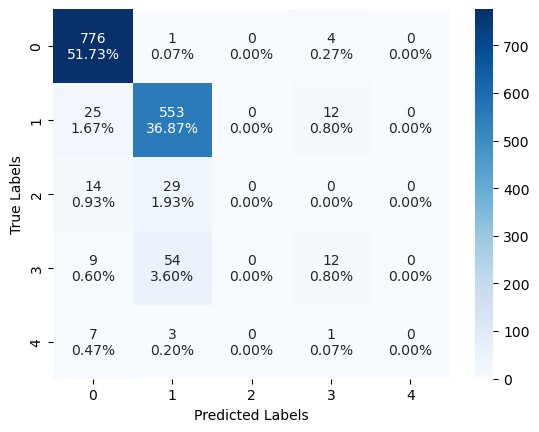

In [79]:
# Visualize the confusion matrix 
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(dpi=100)

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}" for v1, v2, in zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(5,5)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')